# Regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Predictors,-target" data-toc-modified-id="Predictors,-target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Predictors, target</a></span></li><li><span><a href="#Train-/-Test-split" data-toc-modified-id="Train-/-Test-split-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train / Test split</a></span></li></ul></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Train-model" data-toc-modified-id="Train-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Evaluate-model" data-toc-modified-id="Evaluate-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluate model</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cross validation</a></span></li></ul></li></ul></div>

 * **Regression** models are used when the target variable is **quantitative**: 
  - salaries
  - gas emissions
  - age of person in a picture
  - ...
 * **Classification** models are used when the target variable is **qualitative**: 
  - surviving (or not) the Titanic
  - paying back (or not) a loan
  - identifying a dog (or not) in a picture
  - deciding which one of 3 plant species is this one
  - ...

## Data exploration

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [6]:
print(load_boston().get("DESCR"))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
boston['MEDV']=load_boston().target

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.shape

(506, 14)

In [10]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Data preparation

### Predictors, target

In [11]:
X = boston.drop('MEDV', axis=1)

In [12]:
X.shape

(506, 13)

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y = boston.MEDV

In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [16]:
y.shape

(506,)

### Train / Test split

In [17]:
from sklearn.model_selection import train_test_split

In [107]:
# usamos 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

**NOTA**: `train_test_split` hace un split aleatorio. El parámetro `random_state` impone una semilla que hace este split reproducible (mismo split siempre).

In [108]:
X_train.shape

(404, 13)

In [109]:
X.shape

(506, 13)

In [110]:
X.shape

(506, 13)

In [111]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17


In [112]:
y_train.shape

(404,)

In [113]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
y_train.head()

162    50.0
242    22.2
53     23.4
316    17.8
434    11.7
Name: MEDV, dtype: float64

In [115]:
X_test.shape

(102, 13)

In [116]:
X_train.shape

(404, 13)

In [117]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.4640,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21
223,0.61470,0.0,6.20,0.0,0.5070,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60
39,0.02763,75.0,2.95,0.0,0.4280,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
122,0.09299,0.0,25.65,0.0,0.5810,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81


In [118]:
y_train.shape

(404,)

In [119]:
y_test.shape

(102,)

In [120]:
y_test.head()

93     25.0
223    30.1
39     30.8
122    20.5
203    48.5
Name: MEDV, dtype: float64

## Linear regression

### Train model

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()

Utilizamos sólo los datos de train

In [123]:
lr.fit(X_train, y_train)

LinearRegression()

Curioseamos el modelo

In [124]:
pd.Series(lr.coef_, index=X.columns)

CRIM       -0.074834
ZN          0.051475
INDUS       0.039759
CHAS        2.452340
NOX       -16.314911
RM          3.808368
AGE        -0.008769
DIS        -1.434704
RAD         0.274837
TAX        -0.012074
PTRATIO    -0.910117
B           0.010848
LSTAT      -0.514497
dtype: float64

In [125]:
lr.intercept_

34.51326295210989

In [126]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Evaluate model

First we predict test entries

In [127]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.4640,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21
223,0.61470,0.0,6.20,0.0,0.5070,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60
39,0.02763,75.0,2.95,0.0,0.4280,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
122,0.09299,0.0,25.65,0.0,0.5810,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4.54192,0.0,18.10,0.0,0.7700,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79
146,2.15505,0.0,19.58,0.0,0.8710,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
474,8.05579,0.0,18.10,0.0,0.5840,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14
255,0.03548,80.0,3.64,0.0,0.3920,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25


In [128]:
y_pred = lr.predict(X_test).round(1)

In [129]:
y_pred[:10]

array([29.5, 29.3, 31.9, 20.7, 42.3, 26.9, 35.2, 15.6, 24.7, 14.2])

Next we compare with reality

In [130]:
y_test[:10].round(3)

93     25.0
223    30.1
39     30.8
122    20.5
203    48.5
311    22.1
279    35.1
24     15.6
164    22.7
436     9.6
Name: MEDV, dtype: float64

In [131]:
from sklearn import metrics
import numpy as np

In [132]:
metrics.mean_squared_error(y_test, y_pred).round(3)

23.105

In [133]:
metrics.mean_absolute_error(y_test, y_pred).round(3)

3.382

In [134]:
metrics.r2_score(y_test, y_pred).round(3)

0.745

In [135]:
import seaborn as sns

Text(0, 0.5, 'Predicted')

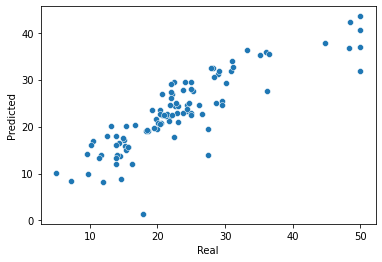

In [136]:
g = sns.scatterplot(x=y_test, y=y_pred)
g.set_xlabel("Real")
g.set_ylabel("Predicted")

Lets observe how the model performs on train set (less important)

In [137]:
y_pred_train = lr.predict(X_train)

In [138]:
y_pred_train[:10]

array([40.02832765, 24.10852472, 24.37395847, 17.55411303, 15.63707798,
       39.26273578, 30.86243299, 12.9996754 , 15.98244307,  8.71838634])

In [139]:
metrics.r2_score(y_train, y_pred_train).round(3)

0.737

In [140]:
metrics.mean_squared_error(y_train, y_pred_train).round(3)

21.761

Try another train / test split now...

Text(0, 0.5, 'Predicted')

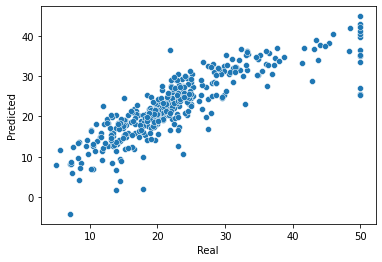

In [106]:
g = sns.scatterplot(x=y_train, y=y_pred_train)
g.set_xlabel("Real")
g.set_ylabel("Predicted")

### Cross validation

Why trust the particular 80%/20% split made by `train_test_split` function? Better repeat and average!!

In [141]:
from sklearn.model_selection import cross_val_score

`cross_val_score` will by default return `r2` score

In [142]:
lr = LinearRegression()

In [155]:
scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=5)

In [156]:
scores

array([-2.62190565, -3.90725478, -4.386606  , -5.57073637, -4.76333993])

Test score is strongly dependent on particular train / test datasets!

The average of 5 splits gives us better idea of the future performance

In [157]:
scores.mean()

-4.249968544192517

In [158]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
